# Import libraries

In [93]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Data

In [94]:
batch_size = 2
img_size = (250,250)
dataset_path = 'Dataset'

train_dataset =  tf.keras.utils.image_dataset_from_directory(
    directory = dataset_path,
    batch_size = batch_size,
    image_size = img_size,
    shuffle = True,
    seed = 2930012,
    validation_split = 0.2, #80% of the images will be used for training
    subset = "training"
)

test_dataset =  tf.keras.utils.image_dataset_from_directory(
    directory = dataset_path,
    batch_size = batch_size,
    image_size = img_size,
    shuffle = True,
    seed = 2930012,
    validation_split = 0.2, #20% of the images will be used for validation
    subset = "validation"
)

class_names = train_dataset.class_names
print(class_names)


#print("Training Set")
#for image_batch, labels_batch in train_ds:
#    print(str(image_batch.shape) + str(labels_batch.shape))

#print("Validation Set")
#for image_batch, labels_batch in test_ds:
#    print(str(image_batch.shape) + str(labels_batch.shape))

Found 24 files belonging to 2 classes.
Using 20 files for training.
Found 24 files belonging to 2 classes.
Using 4 files for validation.
['NORMAL', 'PNEUMONIA']


# Understainding the data

'\n\nThe code below will plot all the batches used for testing purposes.\n\n'

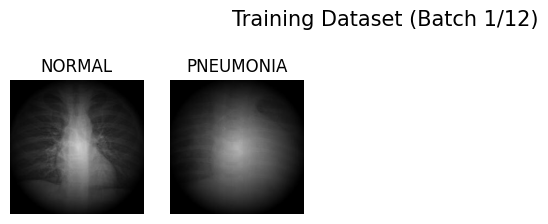

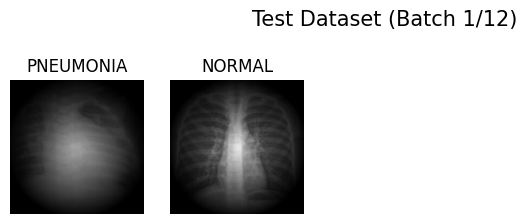

In [95]:
'''

The code below will plot the first batch.

'''

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Training Dataset (Batch 1/12)', fontsize=15)
for images, labels in train_dataset.take(1):
    for x in range(2):
        ax = plt.subplot( 2, 5, x + 1)
        plt.imshow(images[x].numpy().astype("uint8"))
        plt.title(class_names[labels[x]])
        plt.axis("off")
        plt.show

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Test Dataset (Batch 1/12)', fontsize=15)
for images, labels in test_dataset.take(1):
    for x in range(2):
        ax = plt.subplot( 2, 5, x + 1)
        plt.imshow(images[x].numpy().astype("uint8"))
        plt.title(class_names[labels[x]])
        plt.axis("off")
        plt.show


'''

The code below will plot all the batches used for testing purposes.

'''


# for i in range(13):
#     fig = plt.figure(figsize=(10, 5))
#     title = 'Training Dataset (Batch ' + str(i), "/12"
#     fig.suptitle(title, fontsize=15)
#     for images, labels in train_dataset.take(i):
#         for x in range(2):
#             ax = plt.subplot( 2, 5, x + 1)
#             plt.imshow(images[x].numpy().astype("uint8"))
#             plt.title(class_names[labels[x]])
#             plt.axis("off")
#             plt.show


# for i in range(13):
#     fig = plt.figure(figsize=(10, 5))
#     title = 'Test Dataset (Batch ' + str(i), "/12"
#     fig.suptitle(title, fontsize=15)
#     for images, labels in test_dataset.take(i):
#         for x in range(2):
#             ax = plt.subplot( 2, 5, x + 1)
#             plt.imshow(images[x].numpy().astype("uint8"))
#             plt.title(class_names[labels[x]])
#             plt.axis("off")
#             plt.show





# Layers

In [105]:
Autotune = tf.data.AUTOTUNE
no_classes = 2


model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(no_classes)
])



model.compile(
  optimizer = keras.optimizers.Adam(learning_rate =  0.0001),
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
  metrics = ['accuracy'])




# Analysis 

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)         │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 122, 122, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 120, 120, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 500)            │    53,824,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,562,428 (616.31 MB)

 Trainable params: 53,854,142 (205.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,708,286 (410.87 MB)

Epoch 1/15


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 532ms/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 0.7500 - val_loss: 0.2811
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 487ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 0.7500 - val_loss: 0.8917
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 479ms/step - accuracy: 1.0000 - loss: 0.0155 - val_accuracy: 0.7500 - val_loss: 0.5224
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.7500 - val_loss: 0.5367
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 507ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.7500 - val_loss: 0.5767
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 542ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 0.7500 - val_loss: 0.8040
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 462ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.7500 - val_loss: 0.7172
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 459ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.7500 - val

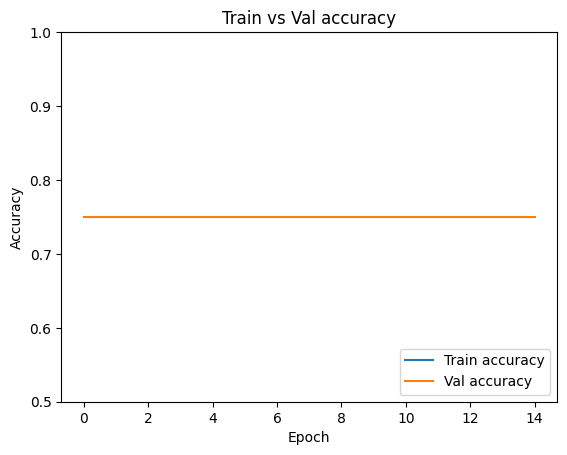

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predictions for validation set: [0 1 1 0]


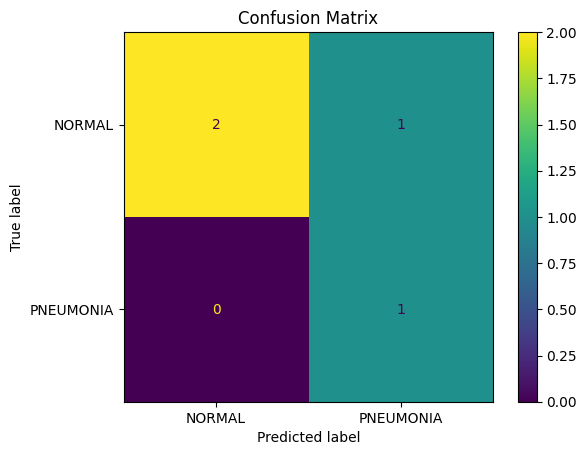

In [ ]:
'''

Train the model

'''

history = model.fit(
  train_dataset,
  validation_data = test_dataset,
  epochs=15
)


'''

'''

model.summary()


'''

'''


plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')
plt.title('Train vs Val accuracy')
plt.show()


'''

Actual Labels with an numpy array.

'''

y_true = np.array([])
for image_batch, labels_batch in test_dataset:
    y_true = np.append(y_true, labels_batch.numpy())

'''

# Evaluate Model

'''

y_prediction = model.predict(test_dataset)
y_prediction = np.argmax(y_prediction, axis = 1)
print('Predictions for validation set: ' + str(y_prediction))

'''

Print confusion matrix

'''

cm = confusion_matrix(y_true, y_prediction)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)
display.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

